# Heart Disease Prediction

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

### Importing the dataset

In [2]:
df = pd.read_csv('heart-disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Exploratory Data Analysis

#### Visualization of distribution count of target values

In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

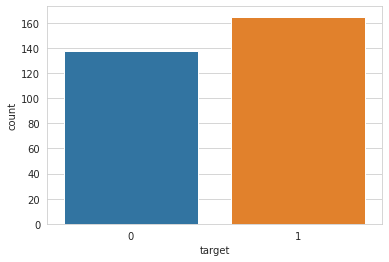

In [8]:
sns.countplot(x = 'target', data=df)
plt.show()

#### Mean of all features according to the target

In [9]:
df.groupby('target').mean().reset_index()

,target,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


#### Heart disease according to sex

In [10]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


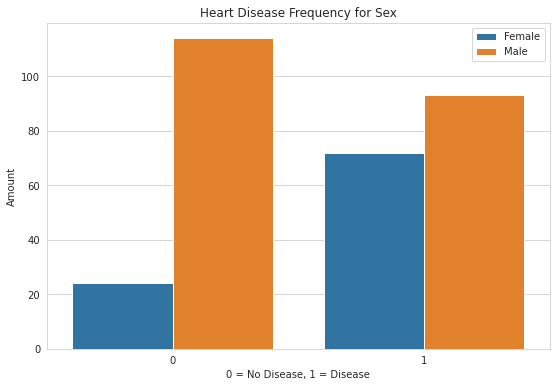

In [11]:
plt.figure(figsize=(9, 6))
sns.countplot(x = 'target', hue='sex', data=df)
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

#### Age distribution

<Figure size 720x432 with 0 Axes>

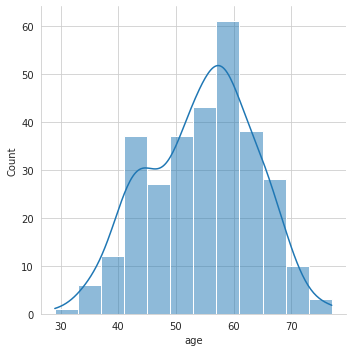

In [12]:
plt.figure(figsize=(10, 6))
sns.displot(x='age', data=df, kde=True)
plt.show()

#### Age vs. Max Heart Rate for Heart Disease

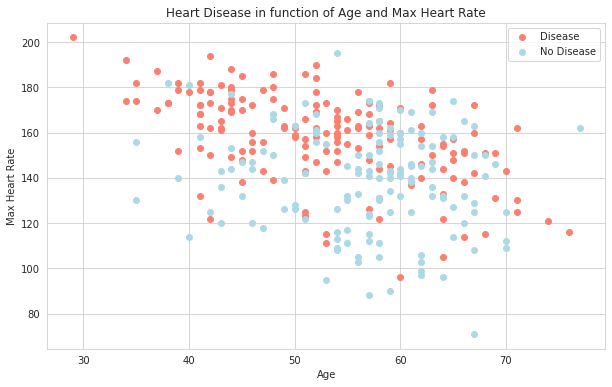

In [13]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")


# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")


# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.show()

### Heart Disease Frequency per Chest Pain Type

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


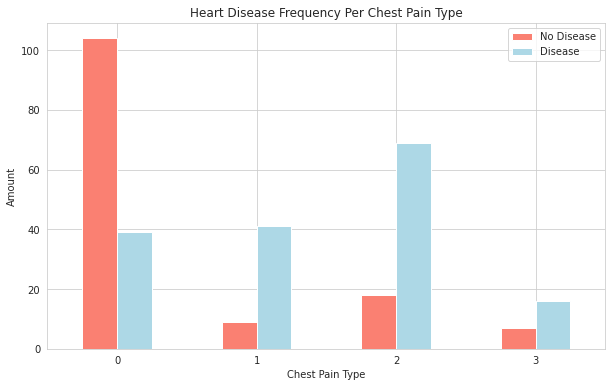

In [15]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

### Calculating and visualizing the correlation

(14.5, -0.5)

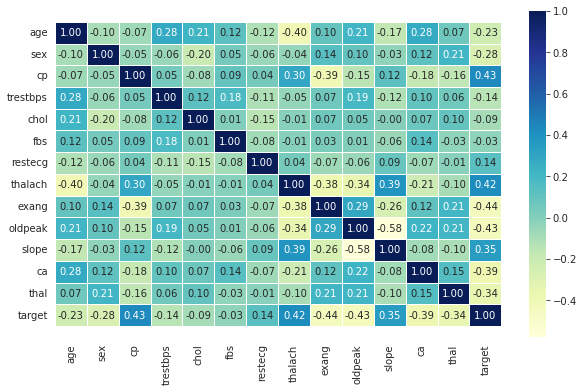

In [16]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Split data into X and y

In [17]:
X = df.drop("target", axis=1)
y = df["target"]

### Splitting the dataset into train and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Fitting different model into the training set

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print('The predicted values:\n ', model.predict(X_test))
    print('\nThe accuracy score: ', model.score(X_test, y_test))

### 1. Logistic Regression

In [21]:
fit_model(LogisticRegression(), X_train, X_test, y_train, y_test)

The predicted values:
  [1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1]

The accuracy score:  0.9016393442622951


### 2. Decision Tree Classifier

In [22]:
fit_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

The predicted values:
  [1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0
 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1]

The accuracy score:  0.819672131147541


### 3. Random Forest Classifier

In [23]:
fit_model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

The predicted values:
  [1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1
 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1]

The accuracy score:  0.9016393442622951


### 4. Support Vector Machine Classifier

In [24]:
fit_model(SVC(kernel='linear'), X_train, X_test, y_train, y_test)

The predicted values:
  [1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1
 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0]

The accuracy score:  0.8688524590163934


### 5. XGB Claassifier

In [25]:
fit_model(XGBClassifier(), X_train, X_test, y_train, y_test)

[14:59:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The predicted values:
  [1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1
 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1]

The accuracy score:  0.8524590163934426


### 6. XGBRF Classifier

In [26]:
fit_model(XGBRFClassifier(), X_train, X_test, y_train, y_test)

[14:59:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The predicted values:
  [1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1
 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1]

The accuracy score:  0.8688524590163934


### 7. K-Nearest Neighbours Classifier

In [27]:
fit_model(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

The predicted values:
  [1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1]

The accuracy score:  0.7049180327868853
